* [Sequence Models](#1)
* [Recurrent Neural Network (RNN)](#2)
* [Implementing Recurrent Neural Network with Keras](#3)
    * [Loading and Preprocessing Data](#31)
    * [Create RNN Model](#32)
    * [Predictions and Visualising RNN Model](#33)
* [Long Short Term Memory (LSTMs)](#4)
* [Implementing Long Short Term Memory with Keras](#99)
    * [Loading and Visualizing Data](#41)
    * [Preprocessing Data](#42)
    * [Create LSTM Model](#43)
    * [Predictions and Visualising LSTM Model](#44)

## Sequence Models
* Sequence models plays an over time. 
* Speech recognition, natural language process (NLP), music generation
* Apples Siri and Google's voice search
* Sentiment classification (duygu sınıflandırma) Mesela "bu ders bu dunyadaki en guzel ders" yada "sacma sapan ders cekmissin hocaaa"  

## Recurrent Neural Network
* RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.
* This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.
* Not only feeds output but also gives feed backs into itself. Because RNN has internal memory
* temporal loop = zamansal döngü. Kendini besler.
* Belleğe sahipler short term memory bir önceki node da olanları hatırlarlar. Eskiyi hatırlar.
* Mesela geçmişi hatırlamak neden önemli biz yaptıklarımızdan bir şeyler öğreniriz ve yeni öğrenilen şeyleri de eski öğrendiklerimizi üzerine kurarız. RNN'i de aynı mantıkta düşünebilirsiniz. Film örneğinde olduğu gibi.
* Örnek RNN yapılarına bakalım
* One to Many
    * Input bir resim output o resimde yapılan cümle yani "Adam surf yapıyor"
* Many to One
    * Input bir cümle output bir duygu mesela iyimser neşeli gibi.
* Many to Many
    * Mesela google translate kullanarak İngilizceden bir cümleyi Türkçe'ye translate etmek
* RNN short term memory'e sahip ama LSTM long term memory'e de sahip olabiliyor.
* RNN'i ANN yada CNN'den ayıran daha önce de belirttiğimiz gibi *memory*. Mesela "DATAI" diye bir stringimiz var ve biz 4. harfe geldik yani "A" harfine. ANN' e sorduğumuz zaman 4. harfi A olan bir kelimenin 5. harfi ne olabilir diye. ANN bilemez çünkü memory olmadığı için geçmiş harfleri yani "DAT" harflerini bilip "A" ile birleştirip daha sonra 5. harf "I" olabilir diyemez. Ama RNN tam olarak bunu söyleyebilir.
* Exploiding Gradients: Gradient'in çok büyük olması durumu. Gereksiz yere belli weightlere önem kazandırır.
* Vanishing Gradients: Gradient'in çok küçük olması durumu. Yavaş öğrenir.
* Gradient neydi arkadaşlar costa göre weightlerde ki değişim.

## Implementing Recurrent Neural Network with Keras
* [Loading and Preprocessing Data](#31)
* [Create RNN Model](#32)
* [Predictions and Visualising RNN Model](#33)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

## 1-Read Data and Preprocessing

In [2]:
dataset_train = pd.read_csv('data/Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


### NOTE
Bu verisetinde yalnızca Open feature'ı üzerinde çalışalıcaktır. Amaç RNN öğrenmektir.

In [4]:
train = dataset_train.loc[:, ["Open"]].to_numpy()
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# Feature Scaling
scaler = MinMaxScaler(feature_range = (0, 1)) # min-max normalization
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

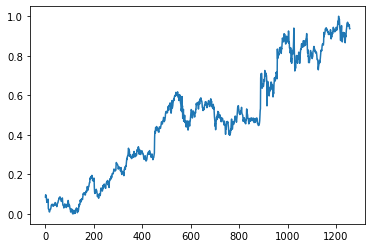

In [6]:
plt.plot(train_scaled)
plt.show()

### NOTE
Burada 50 sample alacağız(x_train), sonraki indexi mesela 51. yi predict edeceğiz, daha sonra 1 index sonraya shifting edip aynı işlem yapılacaktır. Örneğin 3 sample için:

<img src='img/timestep.png'>

In [7]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [9]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

## 2-Create RNN Model and Training Data

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 25ms/step - loss: 0.2825
Epoch 2/100
38/38 [==============================] - 1s 27ms/step - loss: 0.2044
Epoch 3/100
38/38 [==============================] - 1s 26ms/step - loss: 0.1552
Epoch 4/100
38/38 [==============================] - 1s 30ms/step - loss: 0.1121
Epoch 5/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0927
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0678
Epoch 7/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0643
Epoch 8/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0501
Epoch 9/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0425
Epoch 10/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0402
Epoch 11/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0354
Epoch 12/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0305
Epoch 13/100
38/38 [=====

## 3-Predict (Test) Data and Visualising RNN Model

In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('data/Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
real_stock_price = dataset_test.loc[:, ["Open"]].to_numpy()
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [14]:
# Test Data
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # scale edilmiş değerleri, gerçek değerlere dönüştürür.

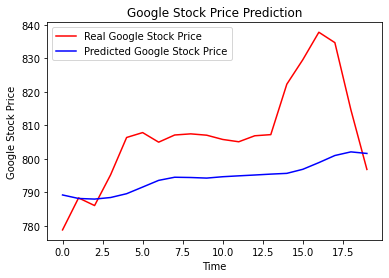

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.

# B-Long Short Term Memory (LSTMs)
* LSTM is variant of RNN.
* LSTM de RNN'den farklı olarak long term memory var. 
* LSTM architecture:
    * x: scaling of information
    * +: Adding information
    * sigmoid layer. Sigmoid memory den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.
    * tanh: activation function tanh. Tanh vanishing gradient(yavaş öğrenme - çok küçük gradient) problemini çözer. Çünkü parametreleri update ederken türev alıyorduk. Tanh'ın türevi hemen sıfır'a ulaşmaz.
    * h(t-1): output of LSTM unit
    * c(t-1): memory from previous LSTM unit
    * X(t): input
    * c(t): new updated memory
    * h(t): output
    * From c(t-1) to c(t) is memory pipeline. or only memory.
    * Oklar vektör.
    * h(t-1) ile X(t) birleşmiyor parallel iki yol olarak düşünebilirsiniz.
* <img src="img/lstm.jpg">
* 1) Forget gate: input olarak X(t) ve h(t-1) alır. Gelen bilginin unutulup unutulmayacağına karar verir.
* 2) Input gate: Hangi bilginin memory de depolanıp depolanmayacağına karar verir.
* 3) Output gate: Hangi bilginin output olup olmayacağına karar verir.
* Örneğin: 
    * ... "Boys are watching TV"
    * "On the other hand girls are playing baseball."
    * Forget "boys". new input is "girls" and output is "girls"

<a id="99"></a>
## Implementing Long Short Term Memory with Keras
* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

## 1-Read Dataset

In [16]:
data = pd.read_csv("data/passengers.csv")
data.head() # İlk indexte 1 ayda international airline'dan 112 kişi geçmiş.

,Month,Number of passengers per month at the international airport
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


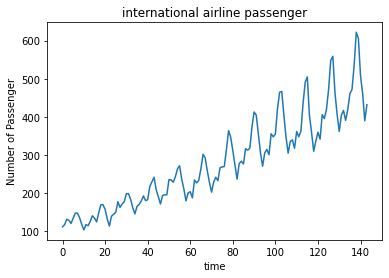

In [17]:
dataset = data.iloc[:, 1].to_numpy()
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

## 2-Preprocessing Data
* reshape
* change type
* scaling
* train test split
* Create dataset

In [18]:
dataset = dataset.reshape(-1, 1) # (142,) => ( 142,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [19]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 72, test size: 72 


In [21]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  


In [22]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## 3-Create LSTM Model

In [24]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1)) #activation function LSTM'de gerek yok 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 1s 1ms/step - loss: 0.0155
Epoch 2/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 8/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 9/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 10/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 11/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 12/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 13/50
61/61 [==============================

## 4-Predictions and Visualising LSTM Model

In [25]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict) # original value
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 17.02 RMSE
Test Score: 43.44 RMSE


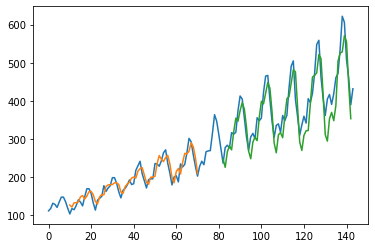

In [26]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and pr edictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show() 

Yukarıdaki plota göre:
- mavi ile gördüğümüz normal datamız
- turuncu ile görülen kısım train edilen data
- yeşiller ise gelecekteki tahmin